In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

## Downsampling 그래프(기본, 비교)
500,000줄 -> 1280줄  
=> resample(0.00002초당 수치, 1280)

### dwn_graph(폴더 num(=사람 num), 파일 num)

In [9]:
def dwn_graph(folder_num, file_num):
    df = pd.read_csv("C:/Users/Daeun/Downloads/심전도DB/{}/{}.csv".format(folder_num,file_num),header=None)
                     
    X = np.arange(0, 500003) # len(X) = 500003               
    x = np.arange(0, 500003, 390.628) # len(x) = 1280
    
    y = np.array(df[1]) # 0.00002초당 ecg
    resample_y = signal.resample(y,1280) # 1280줄로 resampling
    
    
    plt.figure(figsize=(10,8))
    
    # 리샘플링 그래프
    plt.subplot(2, 1, 1)               
    plt.plot(x,resample_y)
    plt.title('resample')

    # 기존 데이터와 리샘플링 비교 그래프
    plt.subplot(2, 1, 2)               
    plt.plot(X, y, 'g-', x, resample_y, 'r-')
    plt.title('origin & resample')
    plt.legend(['data', 'resampled'], loc='best')

    plt.tight_layout()
    plt.show()

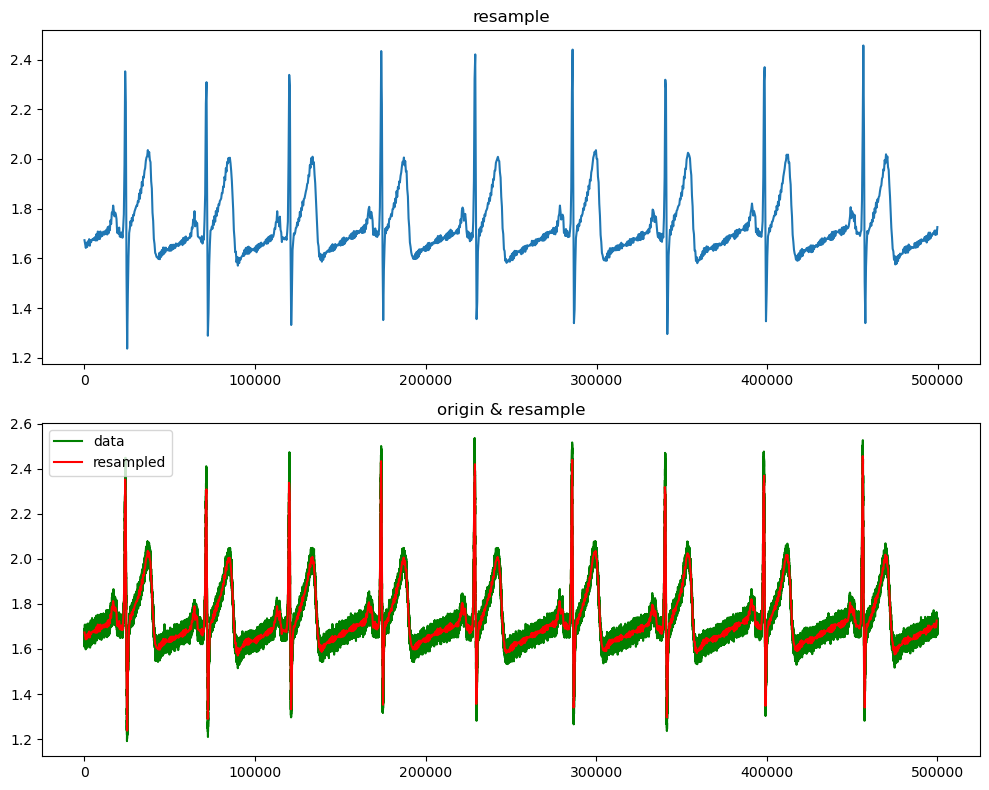

In [10]:
# 2번 사람, 30번 파일
dwn_graph(2,30) 

# 사람별 Downsampling DataFrame

### dwn(폴더 num(=사람 num), 파일 num)

In [7]:
def dwn(folder_num, file_num):
    df = pd.read_csv("C:/Users/Daeun/Downloads/심전도DB/{}/{}.csv".format(folder_num,file_num),header=None)
                     
    y = np.array(df[1]) # 0.00002초당 ecg
    re_y = signal.resample(y,1280)
    
    X = np.arange(0, 500003)                 
    x = np.arange(0, 500003, 390.628) # len(x) = 1280
    
    return re_y

In [8]:
# 1번사람 1번 데이터 downsampling
dwn(1,1)

array([2.01125935, 1.74247201, 1.72670149, ..., 2.47612301, 2.68536956,
       2.61652207])

#### 기본 데이터 프레임 틀 + dwn(1,_) = 1번사람 전체 파일 downsampling dataframe

In [11]:
df = pd.DataFrame({'row':np.arange(0,1280,1)})
df.set_index('row',inplace=True)
#df

In [12]:
for i in range(60):
    # 열 삽입
    df[i+1] = dwn(1,i+1)
df

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
row,,,,,,,,,,,,,,,,,,,,,
0,2.011259,1.835790,1.913108,1.838553,1.692156,1.793201,1.532600,1.915301,2.107629,1.640523,...,1.885162,1.797891,1.704465,1.769560,1.883469,1.797891,1.515998,1.754912,1.596371,1.915301
1,1.742472,1.898218,1.768780,1.733267,1.647441,1.741565,1.638120,1.592925,1.420145,1.453198,...,1.737609,1.773926,1.796925,1.691756,1.692463,1.773926,1.597022,1.784593,1.599349,1.592925
2,1.726701,1.901097,1.786698,1.683230,1.770796,1.712720,1.496240,1.770203,1.608357,1.589444,...,1.694863,1.732476,1.706829,1.778519,1.686026,1.732476,1.504638,1.742650,1.603315,1.770203
3,1.779747,1.928938,1.806435,1.745623,1.626909,1.798719,1.639353,2.085181,1.418759,1.458185,...,1.743823,1.789371,1.816063,1.674186,1.727960,1.789371,1.587039,1.821101,1.617201,2.085181
4,1.713765,1.979999,1.739878,1.705023,1.784427,1.682152,1.483124,2.517780,1.580974,1.603657,...,1.696961,1.673812,1.706609,1.724503,1.691472,1.673812,1.520858,1.766843,1.599933,2.517780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,1.635453,2.140729,1.808390,1.954845,1.622227,2.452951,1.626520,1.825456,1.696341,1.689542,...,1.757673,1.757718,1.685420,1.692600,1.716808,1.757718,1.896415,1.699030,1.601561,1.825456
1276,2.024140,2.068298,1.947775,1.802778,1.571357,2.132698,1.507900,1.925087,1.626887,1.617983,...,1.897715,1.855659,1.618950,1.754455,2.082996,1.855659,1.814956,1.755898,1.614740,1.925087
1277,2.476123,2.064949,1.845578,1.982192,1.567974,1.618629,1.627225,1.854292,1.757847,1.663679,...,2.353254,1.799182,1.693693,1.681022,2.514587,1.799182,1.774316,1.706219,1.624294,1.854292


In [13]:
df.to_csv('1번.csv')

In [14]:
df.T.to_excel('1번.T.xlsx')